# Detecció de parla falsa mitjançant Intel·ligència Artifical

# Index

* Imbalanced datasets
* The metric trap
* Confusion matrix
* Resampling
* Random under-sampling
* Random over-sampling
* Python imbalanced-learn module
* Random under-sampling and over-sampling with imbalanced-learn
* Shrinking (under-sampling the majority class)
* Under-sampling: Tomek links
* Under-sampling: Cluster Centroids
* Over-sampling: SMOTE
* Recommended reading

In [205]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [206]:
import openpyxl
print(openpyxl.__version__)  # Si esto no da error, está instalado correctamente


3.1.5


In [207]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Map 1 library
import plotly.express as px

# Map 2 libraries
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [208]:
# Import data
dd = pd.read_excel("C:/Users/mario/Documents/bits/FibroPredCODIFICADA2.xlsx")
dd.head()


,Pedigree,Sex,FamilialvsSporadic,COD NUMBER,Age at diagnosis,Binary diagnosis,Final diagnosis,TOBACCO,Detail,Comorbidities,...,Date of death,Type of family history,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Mutation Type,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease
0,1,Male,Familial,13820545,70,No IPF,3,2,Tobacco-associated,0,...,2018-07-10 00:00:00,CPFE,1,0,0,1,NaN,3.0,6.0,1
1,2,Male,Familial,12974225,66,No IPF,8,2,NaN,1,...,Not dead,Unspecified PF,1,0,1,1,NaN,1.0,4.0,1
2,3,Male,Familial,13551148,59,No IPF,3,2,Tobacco-associated,0,...,Not dead,Unspecified PF,1,0,0,1,NaN,3.0,6.0,1
3,4,Female,Familial,13597482,66,IPF,1,0,Organizing,1,...,2018-01-11 00:00:00,NaN,1,0,0,0,NaN,4.0,3.0,1
4,5,Male,Familial,10572432,72,IPF,1,0,NaN,1,...,Not dead,"IPF, Dendriform ossification, GPA, IPAF",1,0,1,1,TERT Exon 2b/HT/c.835G>A / p.Ala279Thr/ rs6174...,3.0,6.0,1


In [209]:
dd['Progressive disease'].value_counts()

Progressive disease
0    122
1     98
Name: count, dtype: int64

In [210]:
dd.shape


(220, 76)

In [211]:
columns=dd.columns
print(columns)

Index(['Pedigree', 'Sex', 'FamilialvsSporadic', 'COD NUMBER',
       'Age at diagnosis', 'Binary diagnosis', 'Final diagnosis', 'TOBACCO',
       'Detail', 'Comorbidities', 'Radiological Pattern', 'Detail on NON UIP',
       'Biopsy', 'Pathology Pattern Binary',
       'Pathology pattern UIP, probable or CHP', 'Pathology pattern',
       'Extras AP', 'Diagnosis after Biopsy', 'Multidsciplinary committee',
       'Pirfenidone', 'Nintedanib', 'Antifibrotic Drug', 'Prednisone',
       'Mycophenolate', 'Treatment', 'Extrapulmonary affectation',
       'Type of telomeric extrapulmonary affectation', 'Extra',
       'Associated lung cancer', 'Other cancer', 'Type of neoplasia',
       'Hematological abnormality before diagnosis',
       'Blood count abnormality at diagnosis', 'Anemia', 'Thrombocytopenia',
       'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia', 'Neutrophilia',
       'Neutropenia', 'Leukocytosis', 'Leukopenia', 'Hematologic Disease',
       'Liver abnormality before diagnosi

In [212]:
dd.describe()

,Pedigree,Age at diagnosis,Final diagnosis,TOBACCO,Comorbidities,Biopsy,Diagnosis after Biopsy,Multidsciplinary committee,Pirfenidone,Nintedanib,...,DLCO (%) 1 year after diagnosis,RadioWorsening2y,Necessity of transplantation,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease
count,220.000000,220.000000,220.000000,220.000000,220.000000,217.000000,220.000000,220.000000,220.000000,220.000000,...,216.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,152.000000,149.000000,220.000000
mean,14.718182,66.518182,3.650000,1.159091,0.736364,0.474654,-5.013636,0.845455,0.304545,0.327273,...,56.889630,0.450000,0.150000,0.445455,0.081818,0.222727,0.377273,2.703947,3.885906,0.445455
std,20.549364,10.076630,3.479916,0.982569,0.441609,0.609001,4.852603,0.362295,0.461264,0.470288,...,21.772413,0.722913,0.357886,0.498149,0.274713,0.417026,0.485809,1.982836,1.276239,0.498149
min,0.000000,36.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,...,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000
25%,0.000000,62.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,0.000000,68.000000,1.000000,2.000000,1.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,...,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,26.250000,73.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,69.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,5.000000,1.000000
max,67.000000,92.000000,18.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,128.010000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.000000


['TOBACCO', 'Age at diagnosis', 'Pathology pattern', 'Final diagnosis', 'FamilialvsSporadic', 'Binary diagnosis', 'Comorbidities', 'Genetic mutation studied in patient', 'Radiological Pattern']
Variable TOBACCO
TOBACCO
2    126
0     91
1      3
Name: count, dtype: int64

Variable Age at diagnosis
Age at diagnosis
72    15
70    14
68    11
73    11
75    10
67    10
63    10
69     9
64     9
65     8
61     8
78     8
66     8
71     8
76     7
60     6
62     5
77     5
51     4
74     4
53     4
49     4
58     3
82     3
80     3
81     2
46     2
38     2
59     2
47     2
36     2
54     2
79     2
86     2
50     2
56     2
39     1
45     1
57     1
48     1
44     1
43     1
42     1
92     1
84     1
83     1
52     1
Name: count, dtype: int64

Variable Pathology pattern
Pathology pattern
0                         122
CHP                        41
UIP                        32
Probable UIP               12
NSIP                        3
Necrotizing vasculitis      1
Granuloma

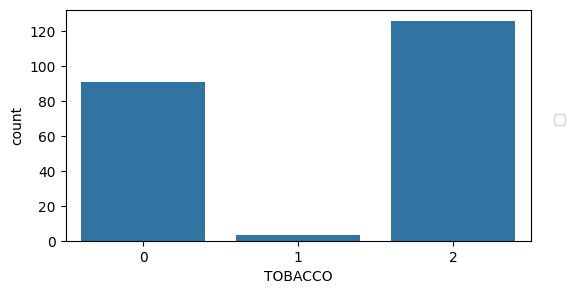

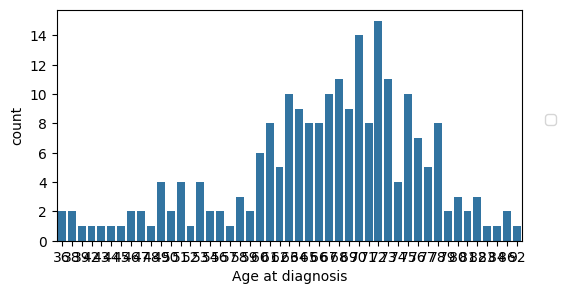

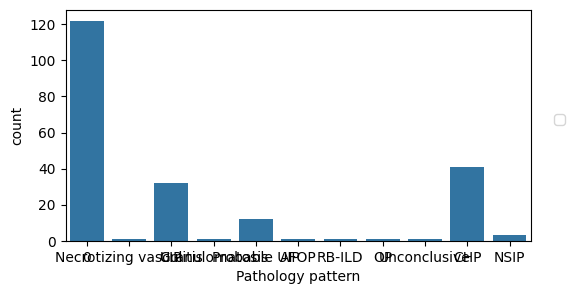

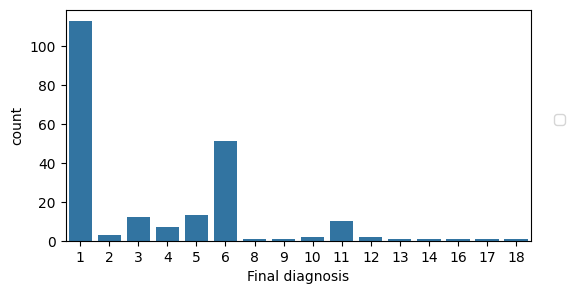

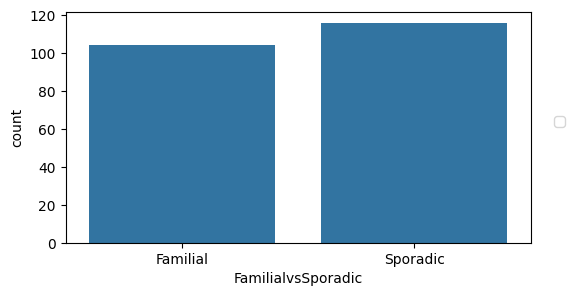

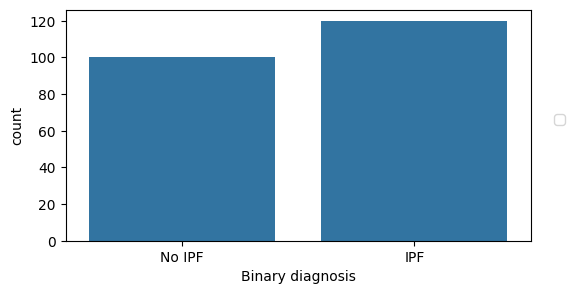

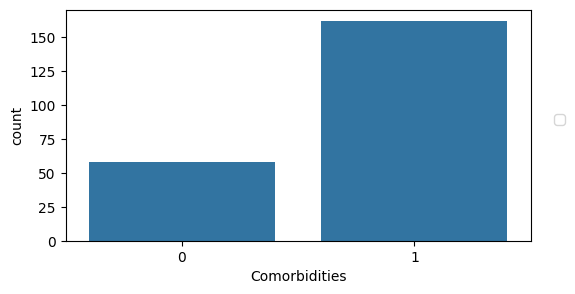

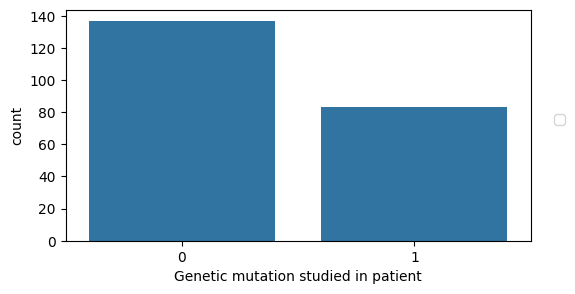

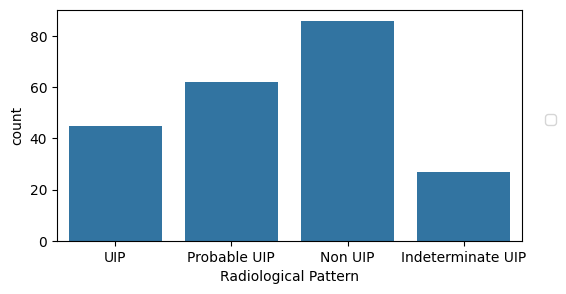

In [213]:
cat_columns=['TOBACCO','Age at diagnosis','Pathology pattern','Final diagnosis','FamilialvsSporadic','Binary diagnosis','Comorbidities','Genetic mutation studied in patient','Radiological Pattern']
print(cat_columns)
for cat_var in cat_columns:
    print('Variable', cat_var)
    print(dd[cat_var].value_counts())
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=dd,x=cat_var)
    plt.legend(loc=(1.05,0.5))
    print('')


In [214]:
dd.describe()

,Pedigree,Age at diagnosis,Final diagnosis,TOBACCO,Comorbidities,Biopsy,Diagnosis after Biopsy,Multidsciplinary committee,Pirfenidone,Nintedanib,...,DLCO (%) 1 year after diagnosis,RadioWorsening2y,Necessity of transplantation,1st degree relative,2nd degree relative,More than 1 relative,Genetic mutation studied in patient,Severity of telomere shortening,Severity of telomere shortening - Transform 4,Progressive disease
count,220.000000,220.000000,220.000000,220.000000,220.000000,217.000000,220.000000,220.000000,220.000000,220.000000,...,216.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,152.000000,149.000000,220.000000
mean,14.718182,66.518182,3.650000,1.159091,0.736364,0.474654,-5.013636,0.845455,0.304545,0.327273,...,56.889630,0.450000,0.150000,0.445455,0.081818,0.222727,0.377273,2.703947,3.885906,0.445455
std,20.549364,10.076630,3.479916,0.982569,0.441609,0.609001,4.852603,0.362295,0.461264,0.470288,...,21.772413,0.722913,0.357886,0.498149,0.274713,0.417026,0.485809,1.982836,1.276239,0.498149
min,0.000000,36.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,...,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000
25%,0.000000,62.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,...,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
50%,0.000000,68.000000,1.000000,2.000000,1.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,...,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,26.250000,73.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,69.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,5.000000,1.000000
max,67.000000,92.000000,18.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,128.010000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.000000


In [215]:
def data_explore_num(dataframe):
    num_cols = len(dataframe.columns)  
    num_rows = (num_cols // 2) + (num_cols % 2 > 0)  

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

    axes = axes.flatten()

    
    for i, col in enumerate(dataframe.columns):
        dataframe[col].hist(bins=500, ax=axes[i], color='purple', edgecolor='purple')
        axes[i].set_title(f"Histograma de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

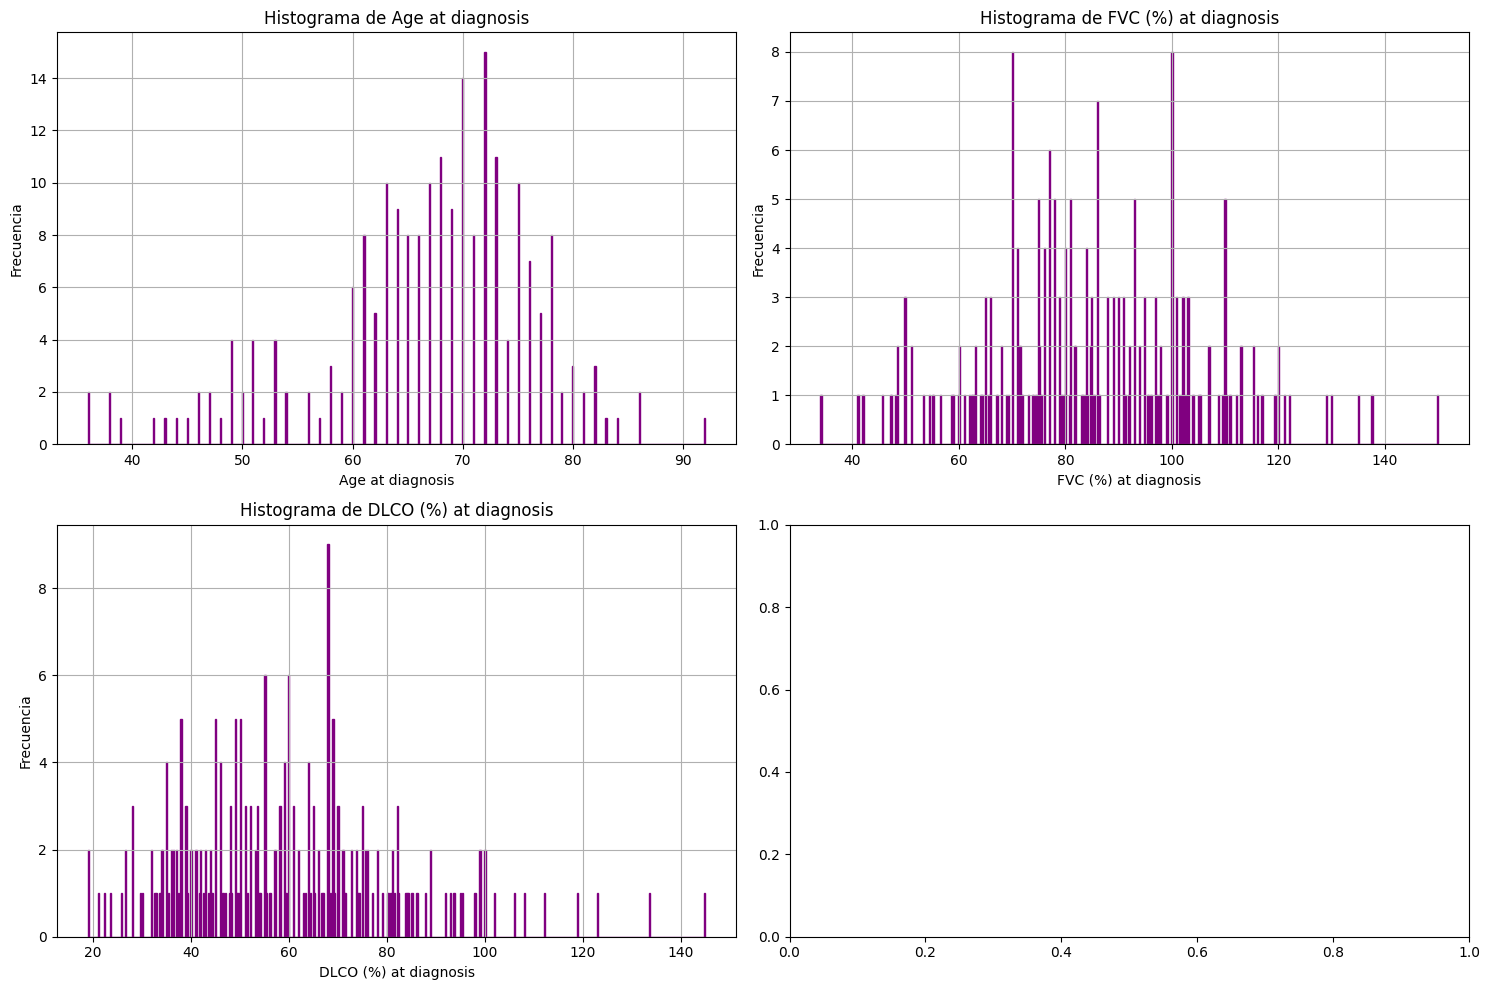

In [216]:
dd_num=dd[['Age at diagnosis','FVC (%) at diagnosis','DLCO (%) at diagnosis']]
data_explore_num(dd_num)

In [245]:
dd['Pathology pattern'] = dd['Pathology pattern'].replace({0: 'No','Granulomatosis':'No'})
#print(dd)   


x=dd[['Sex','TOBACCO','Age at diagnosis','Pathology pattern','FamilialvsSporadic','Binary diagnosis','Comorbidities','Genetic mutation studied in patient','Radiological Pattern', 'FVC (%) at diagnosis','DLCO (%) at diagnosis']]
y=dd['Progressive disease']
from sklearn.preprocessing import LabelEncoder



for col in x.columns:
    if x[col].dtype == 'object' or any(isinstance(val, str) for val in x[col].dropna()):
        print(f"Columna no problemática: {col}")
    else:
        print(f'mal:{col}')
encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':  # Verifica si la columna es categórica
        x[col] = encoder.fit_transform(x[col])

nan_columns = X_train.isnull().any()
print(nan_columns)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.head())
print(y_train.head())
print(X_val.head())
print(y_val.head())
print(X_test.head())
print(y_test.head())


Columna no problemática: Sex
mal:TOBACCO
mal:Age at diagnosis
Columna no problemática: Pathology pattern
Columna no problemática: FamilialvsSporadic
Columna no problemática: Binary diagnosis
mal:Comorbidities
mal:Genetic mutation studied in patient
Columna no problemática: Radiological Pattern
mal:FVC (%) at diagnosis
mal:DLCO (%) at diagnosis
Sex                                    False
TOBACCO                                False
Age at diagnosis                       False
Pathology pattern                      False
FamilialvsSporadic                     False
Binary diagnosis                       False
Comorbidities                          False
Genetic mutation studied in patient    False
Radiological Pattern                   False
FVC (%) at diagnosis                   False
DLCO (%) at diagnosis                  False
dtype: bool
     Sex  TOBACCO  Age at diagnosis  Pathology pattern  FamilialvsSporadic  \
58     1        0                49                  4               

In [246]:

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)


y_val_pred = knn.predict(X_val)
print("Accuracy en test:", accuracy_score(y_val, y_val_pred))
print("Precision en test:", precision_score(y_val, y_val_pred))
print("Recall en test:", recall_score(y_val, y_val_pred))
print("F1-score en test:", f1_score(y_val, y_val_pred))
print("Confusion matrix en test:", confusion_matrix(y_val, y_val_pred))

Accuracy en test: 0.5454545454545454
Precision en test: 0.6111111111111112
Recall en test: 0.4583333333333333
F1-score en test: 0.5238095238095238
Confusion matrix en test: [[13  7]
 [13 11]]


In [247]:
def prediccion(vars):
    variables=['Sex','TOBACCO','Age at diagnosis','Pathology pattern','FamilialvsSporadic','Binary diagnosis','Comorbidities','Genetic mutation studied in patient','Radiological Pattern', 'FVC (%) at diagnosis','DLCO (%) at diagnosis']
    new_samples = pd.DataFrame({variables[i]:[vars[i]] for i in range(len(vars))})
    for col in new_samples.columns:
        if new_samples[col].dtype == 'object':  # Verifica si la columna es categórica
            new_samples[col] = encoder.fit_transform(new_samples[col])

    pred= knn.predict(new_samples)
    return pred

In [221]:
prediccion(['Male',2,57,'No','Sporadic','No','IPF',1,'Probable UIP',70.2,	60.4])

array([0])

Accuracy: 0.6818181818181818
Confusion Matrix:
 [[16  4]
 [10 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.78      0.58      0.67        24

    accuracy                           0.68        44
   macro avg       0.70      0.69      0.68        44
weighted avg       0.70      0.68      0.68        44



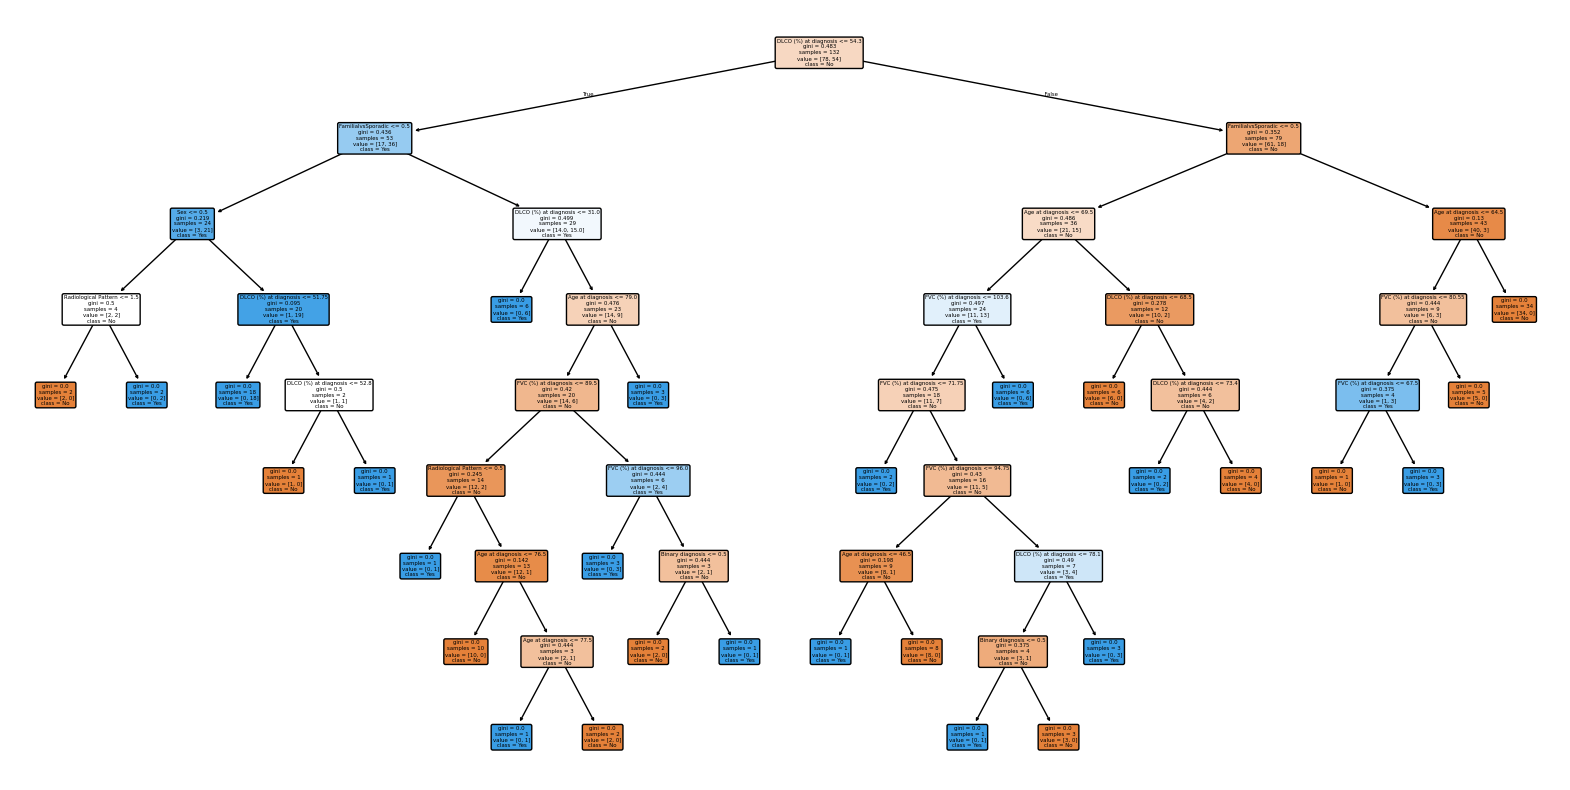

In [249]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier(random_state=42, max_depth=10)  # max_depth para limitar la complejidad
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_val)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Visualización del árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

In [227]:
def prediccion_arbol(vars):
    variables=['Sex','TOBACCO','Age at diagnosis','Pathology pattern','FamilialvsSporadic','Binary diagnosis','Comorbidities','Genetic mutation studied in patient','Radiological Pattern', 'FVC (%) at diagnosis','DLCO (%) at diagnosis']
    new_samples = pd.DataFrame({variables[i]:[vars[i]] for i in range(len(vars))})
    for col in new_samples.columns:
        if new_samples[col].dtype == 'object':  # Verifica si la columna es categórica
            new_samples[col] = encoder.fit_transform(new_samples[col])

    pred= clf.predict(new_samples)
    return pred

In [232]:
prediccion_arbol(['Male',0,44,'No','Sporadic','No','IPF',1,'Probable UIP',70.2,	60.4])

array([1])